# Tutorial de uso dos dados abertos ONS

Nesse exemplo, utilizaremos o dataset ear-diario-por-subsistema dos anos 2000 a 2021. 

In [1]:
#Importar das bibliotecas que serão utilizadas
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.ticker as mtick
import json

# Extração e tratamento dos dados

<b>1) Extração das urls dos datasets que contém os csvs</b>

In [2]:
#Request com a url do dataset utilizado na análise.
#Substituir pela url desejada
r = requests.get('https://dados.ons.org.br/api/3/action/package_search?&rows=1000')

In [3]:
#Print para ver o retorno do request
print(r.text[0:500])

{"help": "https://dados.ons.org.br/api/3/action/help_show?name=package_search", "success": true, "result": {"count": 20, "facets": {}, "results": [{"author": "ONS", "author_email": "", "creator_user_id": "8be381ee-d0ee-426f-ae84-84bacacbd8c5", "id": "02212074-231c-4c44-a949-30a026738b9d", "isopen": true, "license_id": "cc-by", "license_title": "Creative Commons Atribui\u00e7\u00e3o", "license_url": "http://www.opendefinition.org/licenses/cc-by", "maintainer": "ONS", "maintainer_email": "", "meta


In [4]:
#Transformar o request em formato json
json_api = json.loads(r.text)

In [5]:
#Convertendo o formato json em dataframe para facilitar a busca
df_resources = pd.json_normalize(json_api['result']['results'],'resources')

In [6]:
#Verificando o dataset desejado
df_resources['name'][df_resources['name'].str.contains("EAR")]

133    EAR_Diario_por_Reservatorio-2021
134    EAR_Diario_por_Reservatorio-2020
135    EAR_Diario_por_Reservatorio-2019
136    EAR_Diario_por_Reservatorio-2018
137    EAR_Diario_por_Reservatorio-2017
                     ...               
256      EAR_Diario_por_Subsistema-2004
257      EAR_Diario_por_Subsistema-2003
258      EAR_Diario_por_Subsistema-2002
259      EAR_Diario_por_Subsistema-2001
260      EAR_Diario_por_Subsistema-2000
Name: name, Length: 72, dtype: object

In [7]:
#Filtrando apenas o dataset referente a EAR por subsistema
df_EAR_Subsistema = df_resources[df_resources['name'].str.contains("EAR_Diario_por_Subsistema")]

In [8]:
#Confirmando se só temos o formato CSV
df_EAR_Subsistema.format.unique()

array(['CSV'], dtype=object)

In [9]:
#Convertendo em uma lista as urls de acesso aos csvs
urls = df_EAR_Subsistema['url'].tolist()
urls

['https://ons-dl-prod-opendata.s3.amazonaws.com/dataset/ear_subsistema_di/EAR_DIARIO_SUBSISTEMA_2021.csv',
 'https://ons-dl-prod-opendata.s3.amazonaws.com/dataset/ear_subsistema_di/EAR_DIARIO_SUBSISTEMA_2020.csv',
 'https://ons-dl-prod-opendata.s3.amazonaws.com/dataset/ear_subsistema_di/EAR_DIARIO_SUBSISTEMA_2019.csv',
 'https://ons-dl-prod-opendata.s3.amazonaws.com/dataset/ear_subsistema_di/EAR_DIARIO_SUBSISTEMA_2018.csv',
 'https://ons-dl-prod-opendata.s3.amazonaws.com/dataset/ear_subsistema_di/EAR_DIARIO_SUBSISTEMA_2017.csv',
 'https://ons-dl-prod-opendata.s3.amazonaws.com/dataset/ear_subsistema_di/EAR_DIARIO_SUBSISTEMA_2016.csv',
 'https://ons-dl-prod-opendata.s3.amazonaws.com/dataset/ear_subsistema_di/EAR_DIARIO_SUBSISTEMA_2015.csv',
 'https://ons-dl-prod-opendata.s3.amazonaws.com/dataset/ear_subsistema_di/EAR_DIARIO_SUBSISTEMA_2014.csv',
 'https://ons-dl-prod-opendata.s3.amazonaws.com/dataset/ear_subsistema_di/EAR_DIARIO_SUBSISTEMA_2013.csv',
 'https://ons-dl-prod-opendata.s3.ama

<b>2) Conversão dos csvs em dataframe</b>

In [10]:
#Loop que concatena as informações do csvs em dataframe. Indicando ";" como separador das colunas e "." para casas decimais
df = pd.concat([pd.read_csv(url, sep = ';', decimal = '.') for url in urls])

In [11]:
#Print de como ficou o dataframe
df.head()

,id_subsistema,nom_subsistema,ear_data,ear_max_subsistema,ear_verif_subsistema_mwmes,ear_verif_subsistema_percentual
0,NE,NORDESTE,2021-01-01,51602.070312,23875.224609,46.268002
1,N,NORTE,2021-01-01,15164.886719,4328.353027,28.541901
2,SE,SUDESTE,2021-01-01,203567.078125,38488.902344,18.907200
3,S,SUL,2021-01-01,19897.046875,5621.530762,28.253099
4,NE,NORDESTE,2021-01-02,51602.070312,23939.832031,46.393200


In [12]:
#Print das informações do df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31988 entries, 0 to 1463
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id_subsistema                    31988 non-null  object 
 1   nom_subsistema                   31988 non-null  object 
 2   ear_data                         31988 non-null  object 
 3   ear_max_subsistema               31988 non-null  float64
 4   ear_verif_subsistema_mwmes       31988 non-null  float64
 5   ear_verif_subsistema_percentual  31988 non-null  float64
dtypes: float64(3), object(3)
memory usage: 1.7+ MB


In [13]:
#Converter ear_data em formato data
df['ear_data'] = df['ear_data'].astype('datetime64[ns]')

In [14]:
#Info atualizadas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31988 entries, 0 to 1463
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id_subsistema                    31988 non-null  object        
 1   nom_subsistema                   31988 non-null  object        
 2   ear_data                         31988 non-null  datetime64[ns]
 3   ear_max_subsistema               31988 non-null  float64       
 4   ear_verif_subsistema_mwmes       31988 non-null  float64       
 5   ear_verif_subsistema_percentual  31988 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.7+ MB


In [15]:
#Define 2 casas decimais para os valores do dataset
pd.set_option('display.precision',2)

In [16]:
#Confirmando a data mínima
df['ear_data'].min()

Timestamp('2000-01-01 00:00:00')

In [17]:
#Confirmando a data máxima
df['ear_data'].max()

Timestamp('2021-11-22 00:00:00')

# Análise dos dados

Para essa análise queremos confirmar qual o comportamento da EAR MAX ao longo dos anos em relação aos subsistemas

In [18]:
#Descrição dos dados do df
df.describe()

,ear_max_subsistema,ear_verif_subsistema_mwmes,ear_verif_subsistema_percentual
count,31988.00,31988.00,31988.00
mean,68414.43,35850.84,57.42
std,72419.46,41526.03,24.13
min,12311.00,1495.00,4.34
25%,15164.89,9730.00,37.74
50%,35033.50,14751.00,57.27
75%,77813.00,44172.50,78.23
max,203736.36,179345.00,103.66


In [19]:
#Inclusão coluna ano no df a partir da ear_data
df['year'] = df['ear_data'].dt.year

<b>1) Verificação de comportamento sobre a média anual da EAR Máx</b>

In [20]:
#Média ear_max_subsistema agrupada por ano
df1 = df.groupby(['year'], as_index=False).agg({"ear_max_subsistema":np.mean})

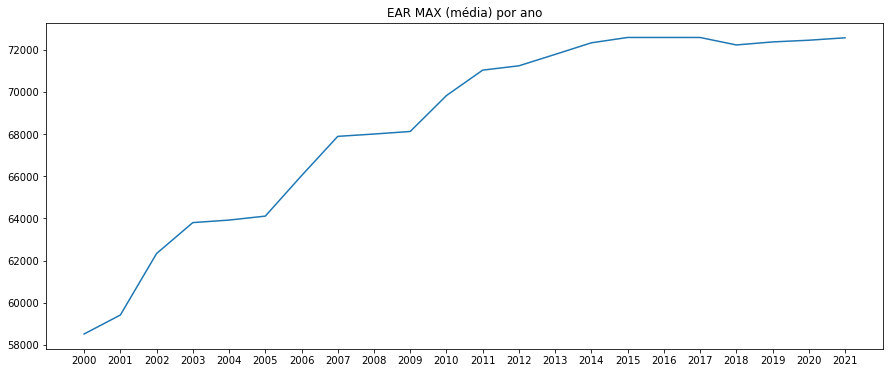

In [21]:
#Plotando um gráfico de linhas utilizando matplotlib
fig = plt.figure(figsize=(15,6))
plt.plot(df1['year'],df1['ear_max_subsistema'], label = 'linear')
plt.title('EAR MAX (média) por ano')
plt.xticks(np.arange(min(df1['year']), max(df1['year'])+1, 1.0))
plt.show()

No gráfico acima, percebemos que houve um aumento da EAR Máx ao longo dos anos. A partir do ano 2015 não tivemos grandes alterações, conforme vimos picos ao longo do gráfico.

<b>2) Verificação de comportamento sobre o valor máximo da EAR, considerando os meses de outubro</b>

In [22]:
#Data máxima nos meses de cada ano
max_date = df.groupby([(df['year']),(df.ear_data.dt.month)]).apply(lambda s: np.max(s.ear_data)).reset_index().iloc[:,2].to_list()

In [23]:
#DF das datas máximas
df2 = df[df['ear_data'].isin(max_date)]
df2 = df2.loc[df2['ear_data'].dt.month == 10]
df2.head()

,id_subsistema,nom_subsistema,ear_data,ear_max_subsistema,ear_verif_subsistema_mwmes,ear_verif_subsistema_percentual,year
1212,NE,NORDESTE,2021-10-31,51602.07,18906.39,36.64,2021
1213,N,NORTE,2021-10-31,15164.89,7047.47,46.47,2021
1214,SE,SUDESTE,2021-10-31,203567.08,37029.14,18.19,2021
1215,S,SUL,2021-10-31,19897.05,10346.39,52.00,2021
1216,NE,NORDESTE,2020-10-31,51602.07,29012.27,56.22,2020


In [24]:
#Valor máximo da EAR do último dia do mês
df2 = df2.groupby(['year']).agg({"ear_max_subsistema":np.max}).reset_index()

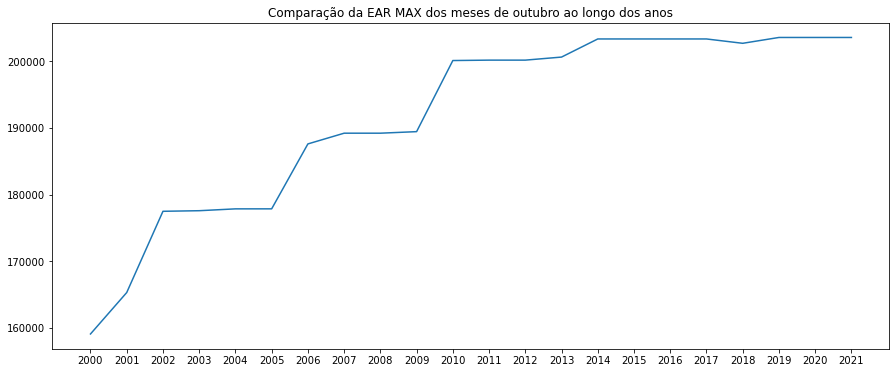

In [25]:
#Plotando um gráfico de linhas utilizando matplotlib
fig = plt.figure(figsize=(15,6))
plt.plot(df2['year'],df2['ear_max_subsistema'], label = 'linear')
plt.title('Comparação da EAR MAX dos meses de outubro ao longo dos anos')
plt.xticks(np.arange(min(df2['year']), max(df2['year'])+1, 1.0))
plt.show()

Considerando apenas um mês para comparação, vemos que segue a mesma tendência de crescimento. Com uma curva mais abrupta do que se considerarmos a média.

<b>3) Verificação de comportamento sobre a média anual da EAR MWmes</b>

In [26]:
#Média ear_verif_subsistema_mwmes agrupada por ano
df3 = df.groupby(['year'], as_index=False).agg({"ear_verif_subsistema_mwmes":np.mean})

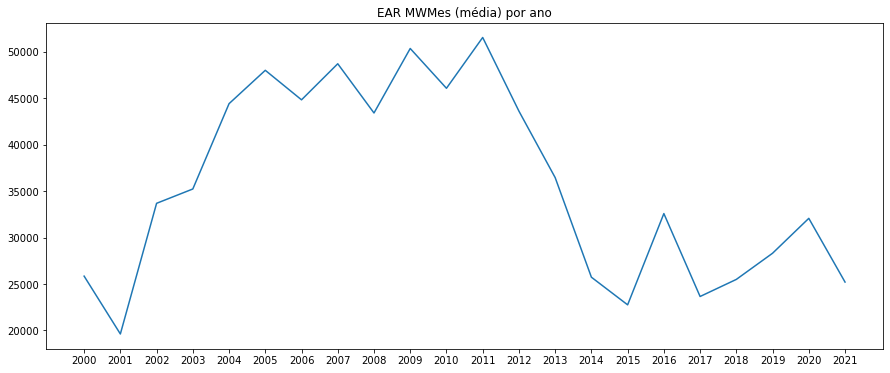

In [27]:
#Plotando um gráfico de linhas utilizando matplotlib
fig = plt.figure(figsize=(15,6))
plt.plot(df3['year'],df3['ear_verif_subsistema_mwmes'], label = 'linear')
plt.title('EAR MWMes (média) por ano')
plt.xticks(np.arange(min(df3['year']), max(df3['year'])+1, 1.0))
plt.show()

Enquanto a EAR Máx apresenta um comportamento mais estável nos últimos anos, a EAR MWmês trouxe uma queda brusca em 2013.

<b>4) Verificar qual é o subsistema com maior EAR MAX</b>

In [28]:
#Média ear_max_subsistema agrupada por nom_subsistema
df4 = df.groupby(['nom_subsistema'], as_index=False).agg({"ear_max_subsistema":np.mean})

<AxesSubplot:title={'center':'EAR MAX (média) por subsistema'}, xlabel='nom_subsistema'>

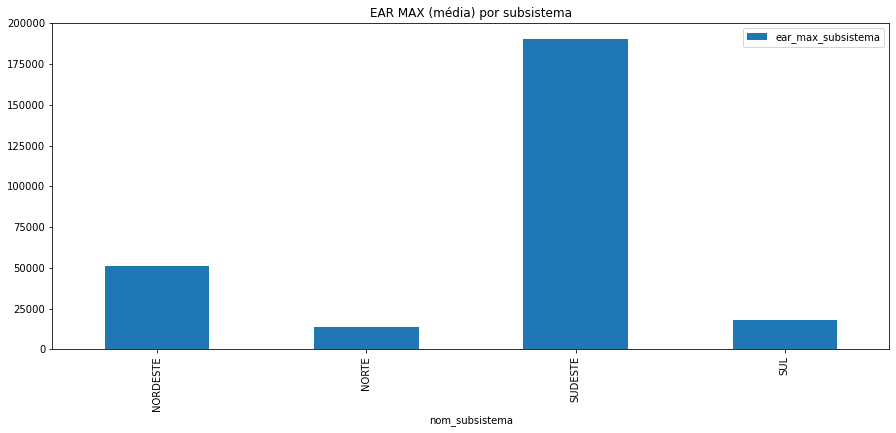

In [29]:
#Plotando um gráfico de barras utilizando matplotlib
df4.plot(kind='bar',x='nom_subsistema',y='ear_max_subsistema', title= 'EAR MAX (média) por subsistema',figsize=(15,6) )


Sudeste em um acumulado dos anos é o principal subsistema.

<b>5) Verificar se o subsistema Sudeste é o principal subsistema ao longo dos anos</b>

In [30]:
#Média ear_max_subsistema agrupada por ano e subsistema
df5 = df.groupby(['year','nom_subsistema']).agg({"ear_max_subsistema":np.mean})

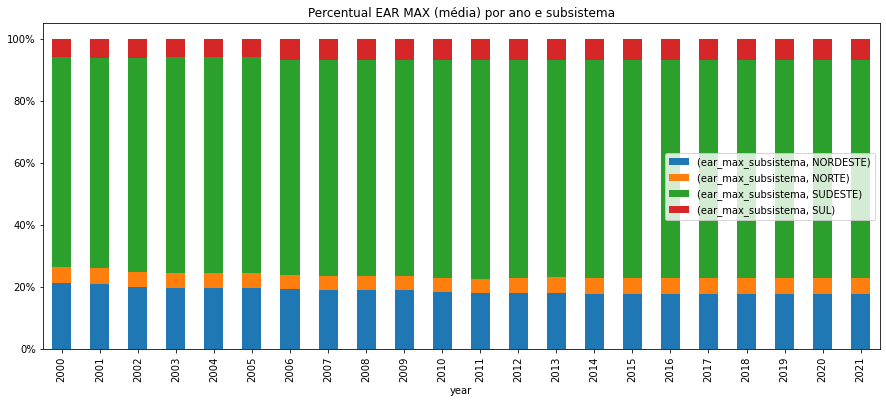

In [31]:
#Plotando um gráfico de barras empilhadas em percentual utilizando matplotlib
ax = df.groupby(['year','nom_subsistema']).agg({"ear_max_subsistema":np.mean}).groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True,figsize=(15,6), title='Percentual EAR MAX (média) por ano e subsistema')
ax.legend()
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

Quando olhamos ao longo dos anos, o Sudeste permanece sendo o maior subsistema

Conclusão da análise:
 - Aumento da média anual de EAR e diminuição média anual do EAR MWMes 
 - Sudeste permanece sendo o subsistema com maior percentual
 - Não houve alterações relevantes por subsistema ao longo dos anos